In [8]:
# Решаем ОДУ

using DifferentialEquations
using Plots

"""Правая часть ОДУ
u --- переменная (скаляр или массив)
p --- параметры (кортеж, tuple)
t --- аргумент (скаляр, время)
"""
function F(u, p, t)
  # p и t не используются в нашем примере
  # но нужны в любом случае для библиотеки
  return u / √(29.25)
end


"Начальное значение"
const u_0 = 2.9
const u_1 = 4.2

"Интервал (кортеж, tuple)"
const T0 = (0, 2π)
const T1 = (π, 3π)

# Задача
prob0 = ODEProblem(F, u_0, T0)
prob1 = ODEProblem(F, u_1, T1)

# Решение задачи
sol0 = solve(
  prob0,
  dtmax=0.1
  )
sol1 = solve(
  prob1,
  dtmax=0.1
  )

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 64-element Vector{Float64}:
 3.141592653589793
 3.241592653589793
 3.3415926535897933
 3.4415926535897934
 3.5415926535897935
 3.6415926535897936
 3.7415926535897936
 3.8415926535897937
 3.941592653589794
 4.0415926535897935
 4.141592653589793
 4.241592653589793
 4.341592653589792
 ⋮
 8.341592653589778
 8.441592653589778
 8.541592653589777
 8.641592653589777
 8.741592653589777
 8.841592653589776
 8.941592653589776
 9.041592653589776
 9.141592653589775
 9.241592653589775
 9.341592653589775
 9.42477796076938
u: 64-element Vector{Float64}:
  4.2
  4.2783804216785715
  4.3582235791910735
  4.4395567701211895
  4.5224078014802505
  4.606804999214175
  4.692777217887831
  4.780353850550126
  4.869564838783198
  4.960440682939144
  5.053012452567788
  5.147311797039059
  5.243370956363584
  ⋮
 10.985375249357656
 11.190384378962891
 11.399219390002989
 11.6

In [13]:
boatr = Float64[0.0, 10.0]
boatang = Float64[3π/2]

point0 = 0
point1 = 0
for (i,ang) in enumerate(sol0.t)
    if (round(ang, digits=1) == round(3π/2, digits=1))
            global point0 = sol0.u[i]
    end
end

for (i,ang) in enumerate(sol1.t)
    if (round(ang, digits=1) == round(3π/2, digits=1))
            global point1 = sol1.u[i]
    end
end

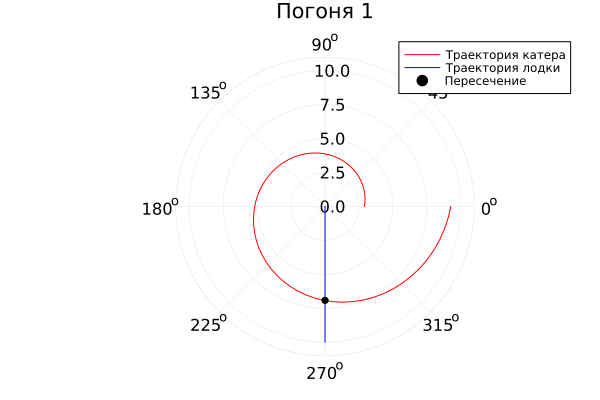

In [11]:
plt0 = plot(
  proj = :polar,
  aspect_ratio=:equal,
  dpi=300,
  title="Погоня 1",
  legend=true)

# воскл. знак в названии обязателен 
# в данном случае! 
plot!(
  plt0,
  sol0.t,
  sol0.u,
  xlabel="θ",
  ylabel="r(t)",
  label="Траектория катера",
  color=:red)
plot!(
  plt0,
  boatang,
  boatr,
  xlabel="θ",
  ylabel="r(t)",
  label="Траектория лодки",
  color=:blue)
plot!(
  plt0,
  boatang,
  [point0],
  seriestype = :scatter,
  label="Пересечение",
  color=:black)

plt0

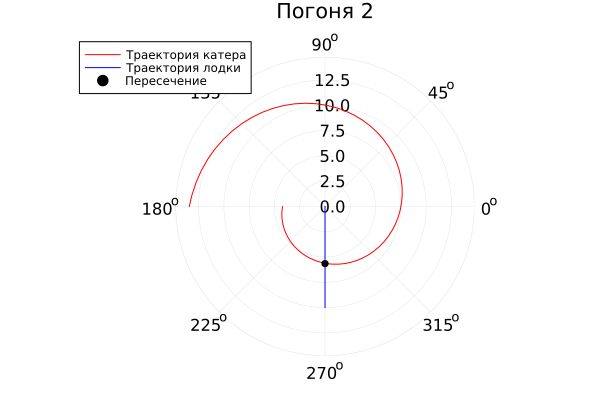

In [15]:
plt1 = plot(
  proj = :polar,
  aspect_ratio=:equal,
  dpi=300,
  title="Погоня 2",
  legend=true)

# воскл. знак в названии обязателен 
# в данном случае! 
plot!(
  plt1,
  sol1.t,
  sol1.u,
  xlabel="θ",
  ylabel="r(t)",
  label="Траектория катера",
  color=:red)
plot!(
  plt1,
  boatang,
  boatr,
  xlabel="θ",
  ylabel="r(t)",
  label="Траектория лодки",
  color=:blue)
plot!(
  plt1,
  boatang,
  [point1],
  seriestype = :scatter,
  label="Пересечение",
  color=:black)

plt1